Disciplina: SCC5948_Ciência_de_dados

Normando de Campos Amazonas Filho

NUSP: 11561949

#Transformação de dados heterogêneos

## Parte 01.

Pré-processamento

In [ ]:
import pandas as pd

data = pd.read_csv("dataset_hepatitis.csv", na_values="?")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              155 non-null    int64  
 1   SEX              155 non-null    object 
 2   STEROID          154 non-null    object 
 3   ANTIVIRALS       155 non-null    object 
 4   FATIGUE          154 non-null    object 
 5   MALAISE          154 non-null    object 
 6   ANOREXIA         154 non-null    object 
 7   LIVER_BIG        145 non-null    object 
 8   LIVER_FIRM       144 non-null    object 
 9   SPLEEN_PALPABLE  150 non-null    object 
 10  SPIDERS          150 non-null    object 
 11  ASCITES          150 non-null    object 
 12  VARICES          150 non-null    object 
 13  BILIRUBIN        149 non-null    float64
 14  ALK_PHOSPHATE    126 non-null    float64
 15  SGOT             151 non-null    float64
 16  ALBUMIN          139 non-null    float64
 17  PROTIME         

### Questão 01.

Crie uma lista com atributos numéricos e outra com os atributos categóricos da base.

In [ ]:
features_numericos = ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT',
                      'ALBUMIN', 'PROTIME']

features_categoricos = ["SEX", "STEROID","ANTIVIRALS","FATIGUE","MALAISE",
                        "ANOREXIA","LIVER_BIG","LIVER_FIRM",
                        "SPLEEN_PALPABLE","SPIDERS","ASCITES","VARICES",
                        "HISTOLOGY"]

### Questão 02.

Nessa questão, você irá fazer o pré-processamento dos dados.

Você deve:


*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média - `mean` (`sklearn.impute.SimpleImputer`). Depois padronize o intervalo dessas variáveis (`sklearn.preprocessing.StandardScaler`)
*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes - `most_frequent` (`sklearn.impute.SimpleImputer`). Depois converta os dados categóricos para uma representação numérica (`sklearn.preprocessing.OneHotEncoder`),

Lembre-se de utilizar as classes `sklearn.pipeline.Pipeline` e `sklearn.compose.ColumnTransformer` conforme consta no material complementar.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

def transformar_base(df, features_numericos, features_categoricos):
    transformer_numerico = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    transformer_categorico = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder())])

    preprocessor = ColumnTransformer(
        transformers=[
            ('numerico', transformer_numerico, features_numericos),
            ('categorico', transformer_categorico, features_categoricos),
        ])
    data_t = preprocessor.fit_transform(df)
    data_t = np.c_[data_t, df.iloc[:, -1]]
    print(data_t.shape)
    return data_t

In [ ]:
df_tf = transformar_base(data, features_numericos, features_categoricos)

(155, 33)


## Parte 02.

Correlação, Covariância e visualização

In [ ]:
import pandas as pd
iris = pd.read_csv('iris_modif_novo.data', index_col=0)
iris

,A,B,C,D,E,F
0,4.9,3.0,1.4,30.0,0.2,Iris-setosa
1,4.7,3.2,1.3,32.0,0.2,Iris-setosa
2,4.6,3.1,1.5,31.0,0.2,Iris-setosa
3,5.0,3.6,1.4,36.0,0.2,Iris-setosa
4,5.4,3.9,1.7,39.0,0.4,Iris-setosa
...,...,...,...,...,...,...
144,6.7,3.0,5.2,30.0,2.3,Iris-virginica
145,6.3,2.5,5.0,25.0,1.9,Iris-virginica
146,6.5,3.0,5.2,30.0,2.0,Iris-virginica
147,6.2,3.4,5.4,34.0,2.3,Iris-virginica


### Questão 01.
* Calcule a matriz de covariância (`np.cov`)
* Crie um heatmap (`sns.heatmap`) para cada matriz
* Dica: Atente-se ao atributo rowvar

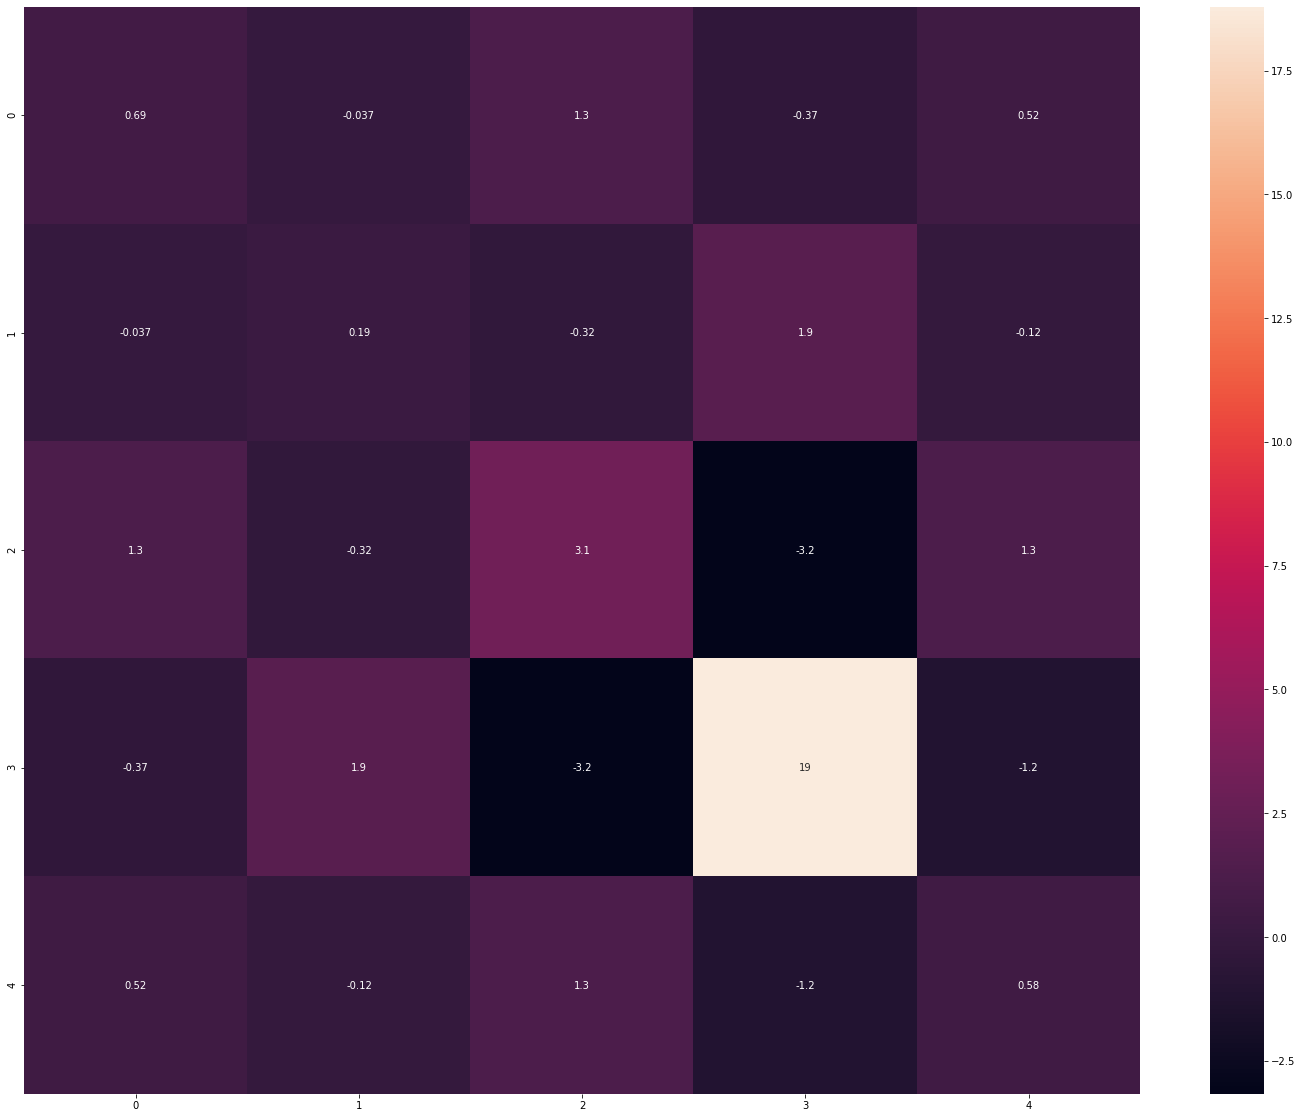

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [25, 20]
cov_matrix = np.cov(iris[['A','B','C','D','E']].to_numpy(), rowvar=False)
sns.heatmap(data=cov_matrix, annot=True)

### Questão 02.

Agora calcule a matriz de correlação (`pandas.DataFrame.corr` ou `np.corrcoef`) utilizando o método de Pearson, gerando um heatmap da matriz.

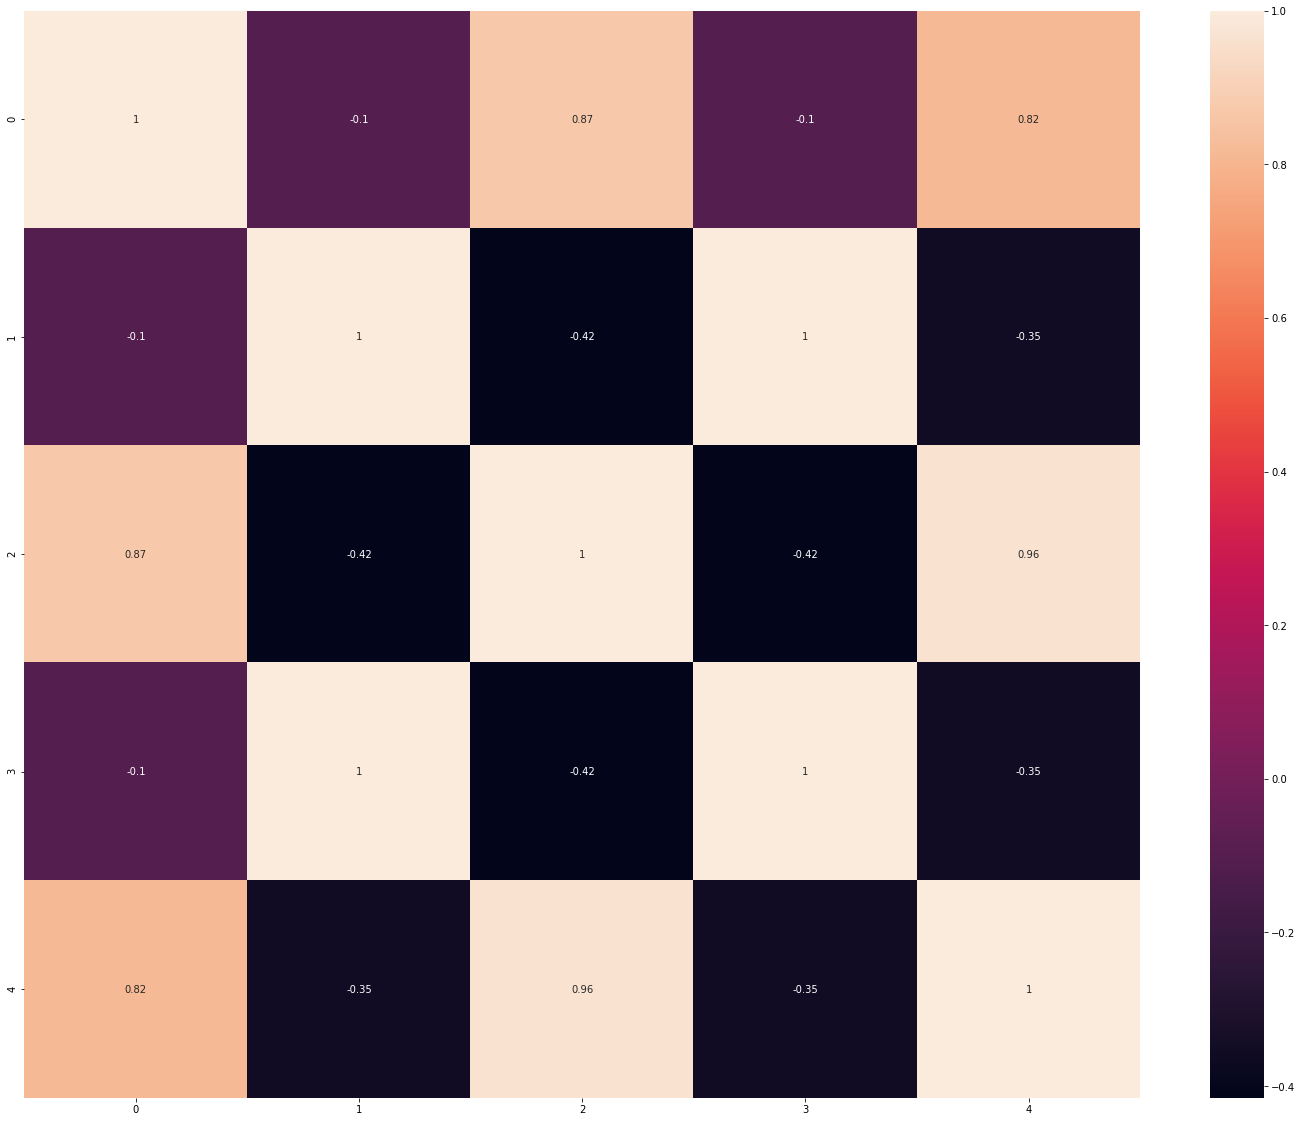

In [ ]:
plt.rcParams['figure.figsize'] = [25, 20]
corr_matrix = np.corrcoef(iris[['A','B','C','D','E']].to_numpy(), rowvar=False)
sns.heatmap(data=corr_matrix, annot=True)

### Questão 03.

O método da Q2 apresenta alguma vantagem com relação ao método da Q1?

Resposta: A normalização dos dados facilita a interpretação dos resultados.

### Questão 04.

*  Utilizando o resultado da matriz de correlação, verifique se existe um atributo reduntante nessa base e crie um novo `Dataframe` sem ele.

Resposta: Pela matriz podemos observar que o atributo B e D (id 1 e 3 na matriz) possuem correlação 1. Assim, podemos considerá-los redundantes.

In [ ]:
iris_novo = iris.drop(columns=['D', 'F']) # tirando um dos reduntantes e a label

### Questão 05.

Agora calcule as matrizes de correlação utilizando os métodos de Kendall e Spearman. Exiba seus heatmaps.

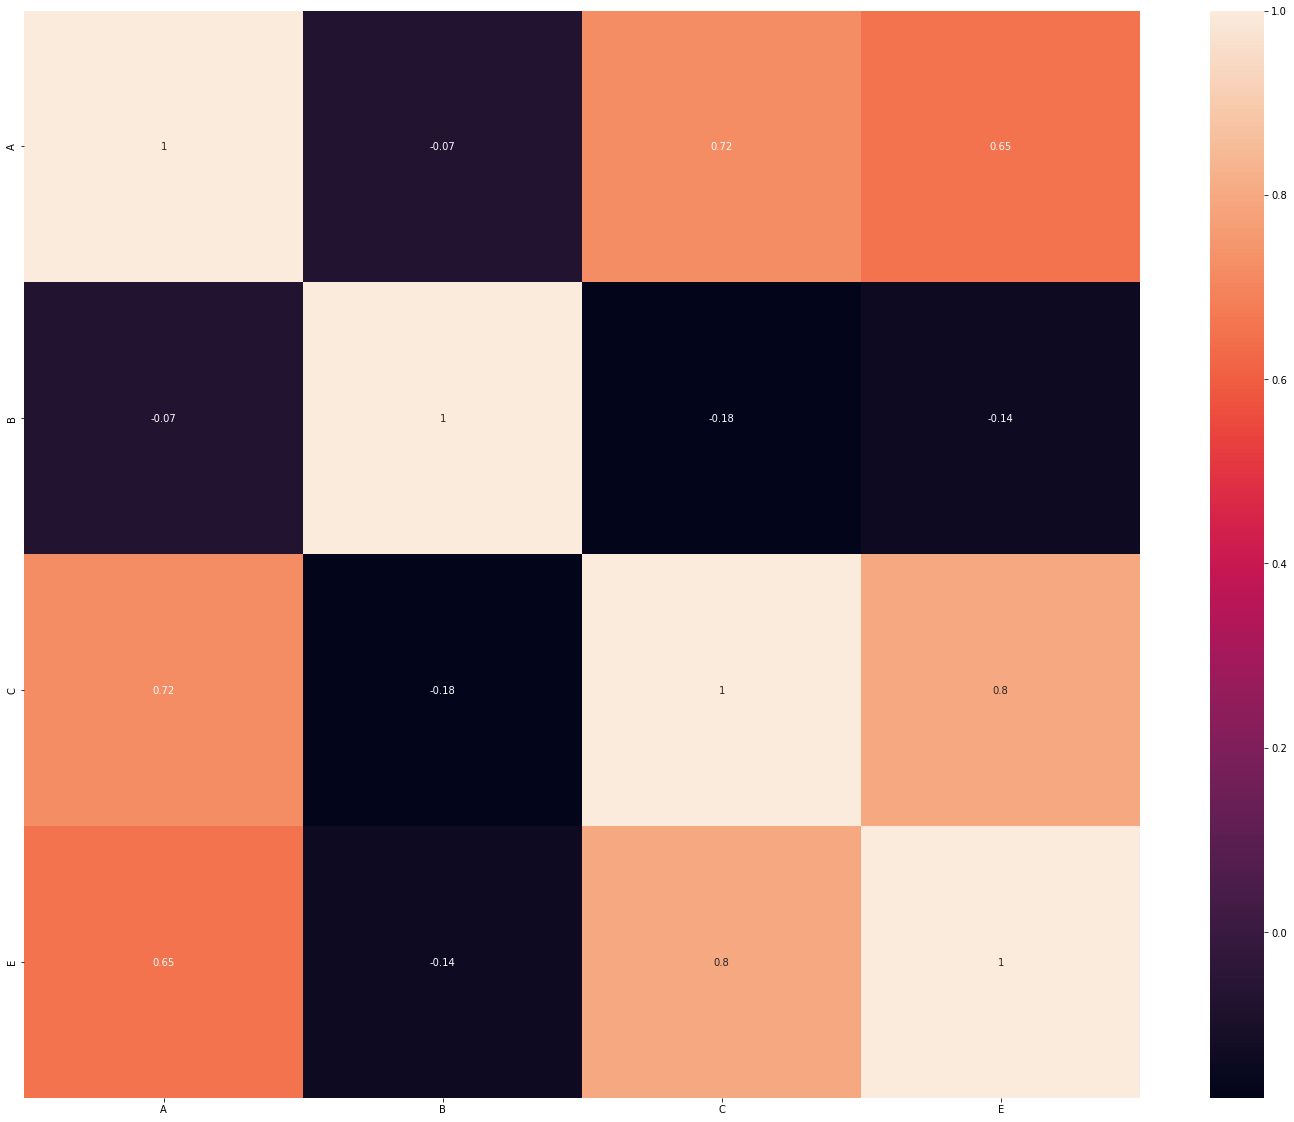

In [ ]:
correlation_matrix = iris_novo.corr(method="kendall").round(2)
sns.heatmap(data=correlation_matrix, annot=True)

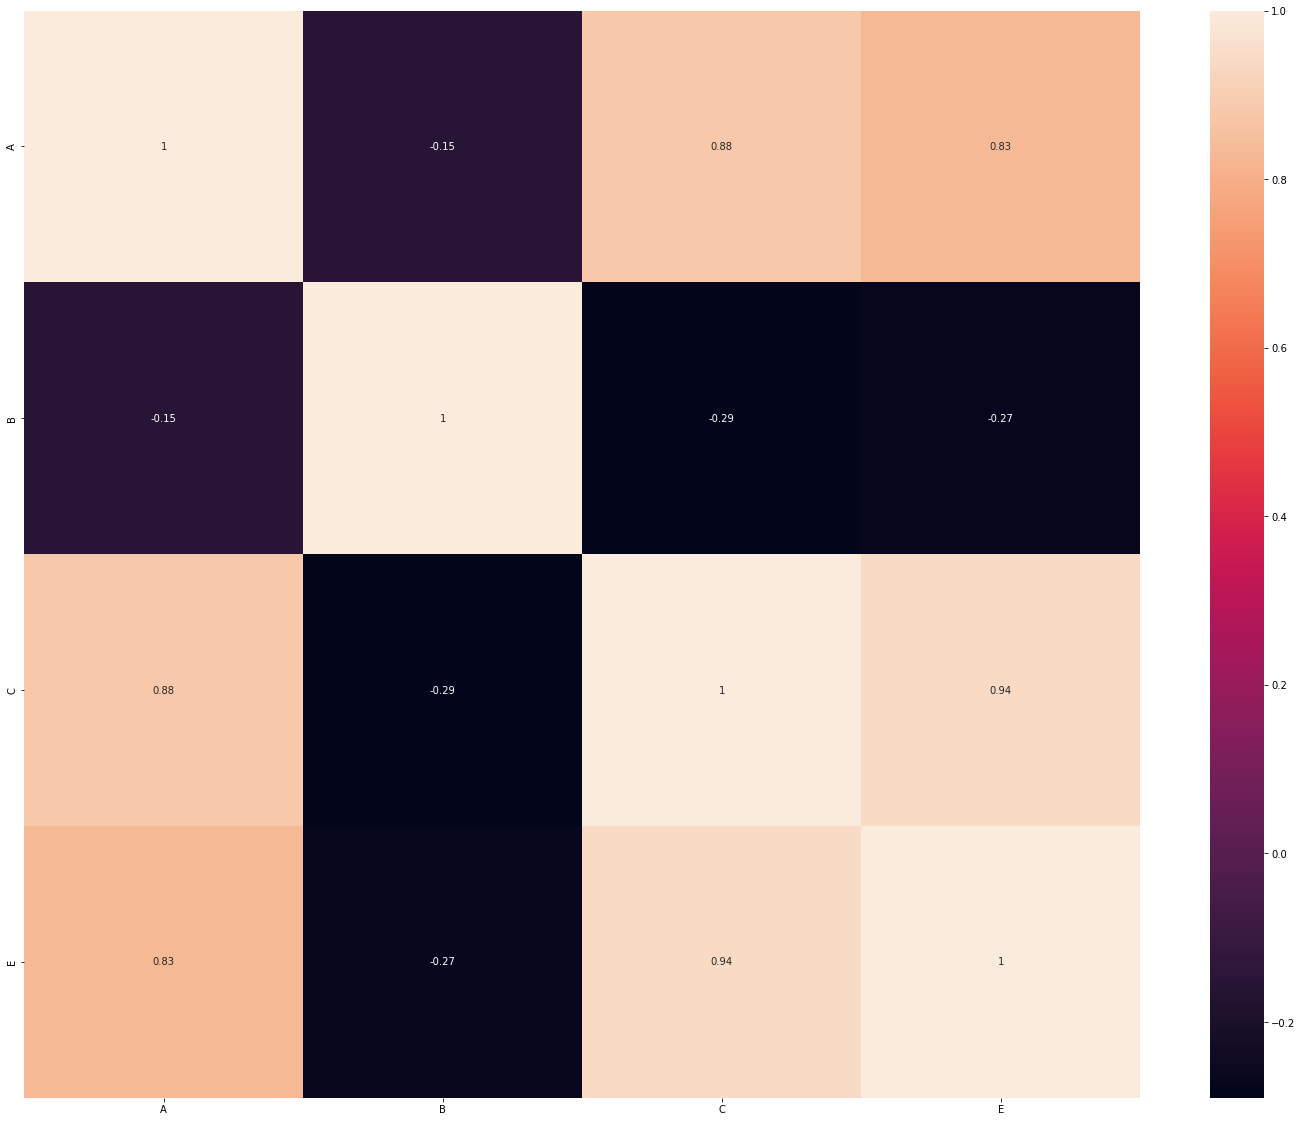

In [ ]:
correlation_matrix = iris_novo.corr(method="spearman").round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### Questão 06.

Determine os pares de variáveis que apresentam maior e menor correlação de spearman. Depois produza scatter plots (`matplotlib.pyplot.scatter`) desses pares de variáveis. Comente como os dados estão distribuídos nos gráficos.

(0.0, 4.5)

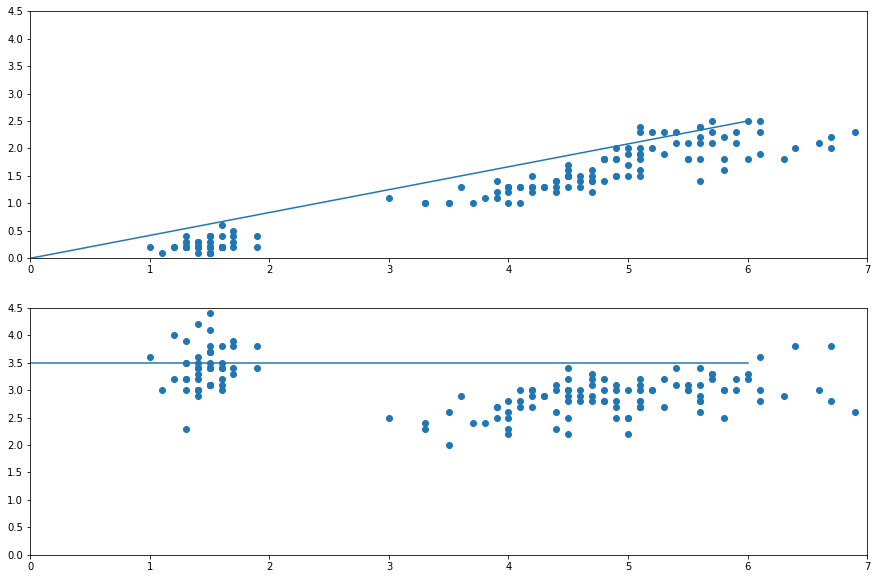

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
linha_a = np.linspace(0,2.5,7)

axs[0].scatter(iris_novo['C'], iris_novo['E'])
axs[0].plot(linha_a)
axs[0].set_xlim(0,7)
axs[0].set_ylim(0,4.5)


axs[1].scatter(iris_novo['C'], iris_novo['B'])
axs[1].plot(np.ones(7)*3.5)
axs[1].set_xlim(0,7)
axs[1].set_ylim(0,4.5)

### Resposta: No caso das variáveis com maior correlação, dos dados estão mais linearmente distribuídos. No caso da menor correlação, os dados não seguem uma distribuíção bem definida

### Questão 07.

Produza um diagrama de torta (`matplotlib.pyplot.pie`) mostrando a distribuição das classes

([<matplotlib.patches.Wedge at 0x7f47ce1aea90>,
 [Text(0.5432911950694249, 0.9564699040534608, 'Iris-virginica'),
  Text(-1.0997554996541645, -0.02319139884567615, 'Iris-versicolor'),
  Text(0.5633358654770906, -0.9448029967496809, 'Iris-setosa')],
 [Text(0.2963406518560499, 0.521710856756433, '33.56'),
  Text(-0.5998666361749987, -0.012649853915823352, '33.56'),
  Text(0.30727410844204933, -0.5153470891361895, '32.89')])

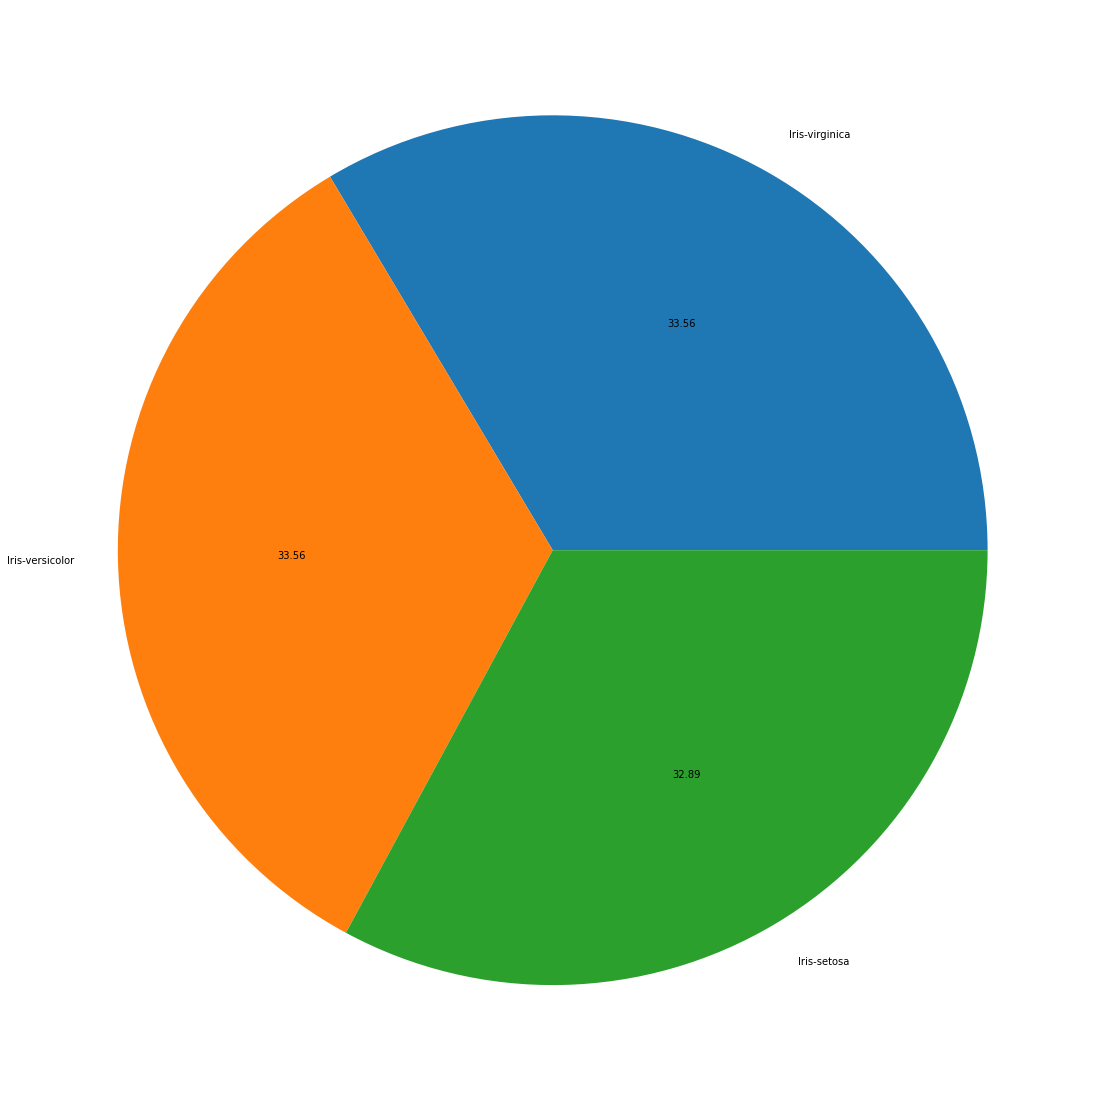

In [ ]:
vc = iris['F'].value_counts()
names = vc.index
dist = vc.values
plt.pie(dist, labels=names, autopct='%.2f')